In [6]:
%%capture
from __future__ import annotations

# To reload modules on update without restarting the kernel
%load_ext autoreload
%autoreload 2

from helpers import Corpus, Model
from sentence_transformers import SentenceTransformer

In [7]:
core_concepts = {
    "artificial intelligence" : {
        "ai domain" : {},
        "ai system" : {
            "no risk ai system" : {},
            "high risk ai system" : {},
            "low risk ai system" : {},
            
        },
        "ai system development process" : {
            "ai system approach" : {},
            "ai system quality measure" : {},
             "ai system properties" : {},
        },
    },

    "data" : {
        "personal data" : {},
        "pseudo anonymous data" : {},
        "anonymous data" : {},
    },

    "organization or person" : {
        "provider" : {},
        "user" : {
            "affected entity" : {},
        },
        "regulator" : {
            "eu country" : {},
        },
    },

    "risk": {
        "data risk" : {
            "poisoning risk" : {},
        },
        "system risk" : {
            "terrorist attack risk" : {},
        },
        "risk management" : {},
    },

    "law": {
        "regulation": {
            "right": {},
            "rule": {},
            "requirement": {},
            "obligation": {},
        },
        "law text": {},
        "authority": {},
    },

    "market": {
        "product": {},
        "service": {},
    },

    "other": {},

    "system": {},
}

In [8]:
import pandas as pd
source = r"..\new term classification.xlsx"
new_cls = pd.read_excel(source)["Concept"]
print(len(new_cls))
new_cls = new_cls.str.lower()
new_cls.replace("anythingai","artificial intelligence",inplace=True)

900


In [114]:
len(pd.unique(new_cls))

901

In [4]:
pandas.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTSsp1oV819VYKVBC8JV3Cbsat2Q9iEL0Zh_-RMIRgrP3eR9RkWLceBVrzlBrEPlZ9sMnBROvKWo8Hm/pub?gid=0&single=true&output=csv")

,Concept,Fréquence,Core Concept,General Core Concept,MH,Patricia,Margo,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,medical condition,1.0,Artificial intelligence,NaN,NaN,NaN,C'est du contexte,NaN,NaN,Core Concept,NaN,NaN,NaN
1,artificial intelligence field,1.0,Artificial intelligence,NaN,NaN,NaN,NaN,NaN,NaN,Artificial intelligence,202.0,AnyRisk,40.0
2,aviation safety,1.0,Artificial intelligence,NaN,NaN,NaN,NaN,NaN,NaN,Data,58.0,AnyData,58.0
3,biometric identification,1.0,Artificial intelligence,NaN,NaN,NaN,NaN,NaN,NaN,Law,261.0,Organization or Person,113.0
4,border control,4.0,Artificial intelligence,NaN,NaN,NaN,NaN,NaN,NaN,Organization or Person,113.0,AnyRisk,119.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,cross-border user,1.0,Organization or Person,Organization or Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
915,employee,1.0,Organization or Person,Organization or Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
916,legal person,12.0,Organization or Person,Organization or Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
917,religious minorities,1.0,Organization or Person,Organization or Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Corpus based around top level core concepts
corpus = Corpus(
    source="https://docs.google.com/spreadsheets/d/e/2PACX-1vTSsp1oV819VYKVBC8JV3Cbsat2Q9iEL0Zh_-RMIRgrP3eR9RkWLceBVrzlBrEPlZ9sMnBROvKWo8Hm/pub?gid=0&single=true&output=csv",
#     source = r"..\new term classification.xlsx",
    core_concepts = core_concepts
)
# corpus = Corpus()

NameError: name 'Corpus' is not defined

In [5]:
# corpus.extract_terms_from_pdf("Data/EU.pdf")
corpus.extract_terms_from_onto()

NameError: name 'corpus' is not defined

In [96]:
corpus.extract_hyponyms()

In [97]:
X, y = corpus.get_training_data()

In [3]:
# model = Model(corpus, min_points=4, dimensions=10, clusterer="c-dbscan", reducer="umap")
model = Model(corpus, min_points=4, dimensions=10, classifier="svm", reducer="none")

NameError: name 'Model' is not defined

0.04148189
361


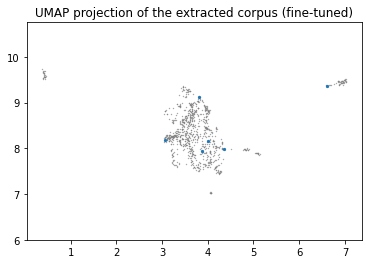

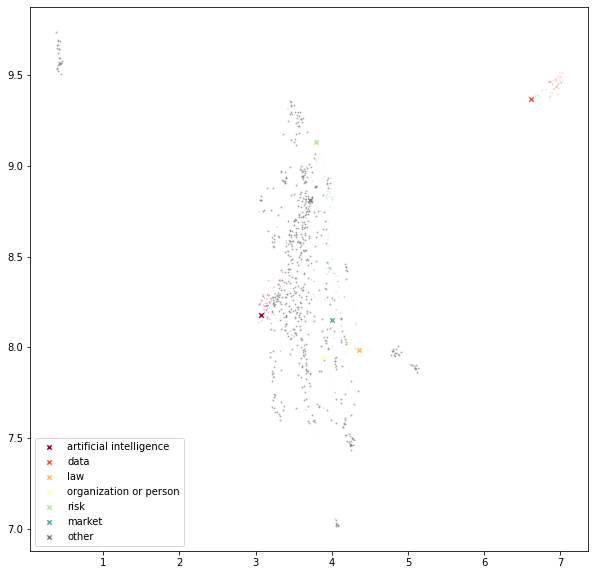

cluster size :
|-artificial intelligence : 63
|-data : 44
|-law : 38
|-organization or person : 77
|-risk : 59
|-market : 46
|-other : 627
  |-unlabeled terms within 'other': 593
0.14776611
370


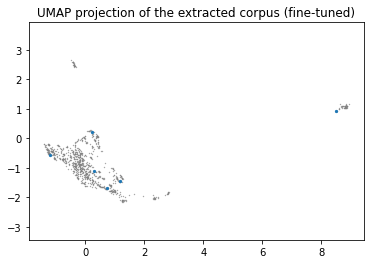

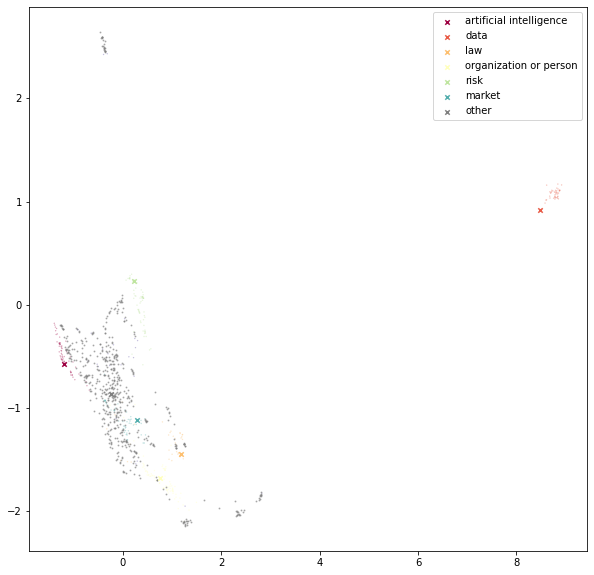

cluster size :
|-artificial intelligence : 63
|-data : 44
|-law : 38
|-organization or person : 83
|-risk : 63
|-market : 53
|-other : 610
  |-unlabeled terms within 'other': 584
0.1864601
367


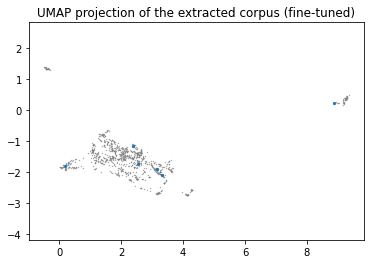

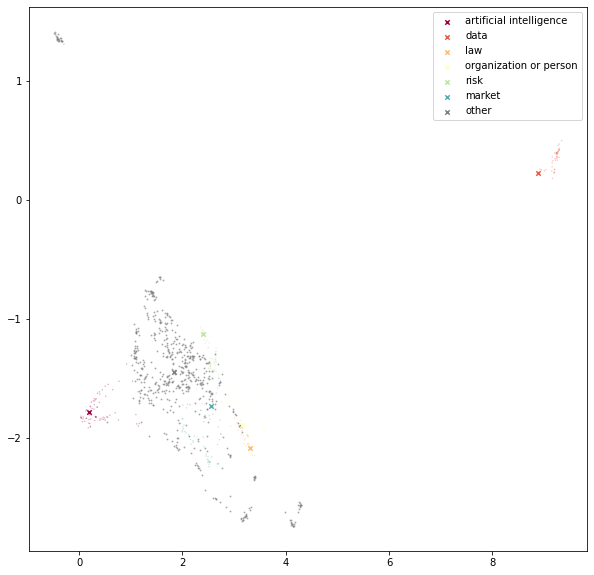

cluster size :
|-artificial intelligence : 70
|-data : 44
|-law : 42
|-organization or person : 84
|-risk : 63
|-market : 58
|-other : 593
  |-unlabeled terms within 'other': 587
0.18067625
418


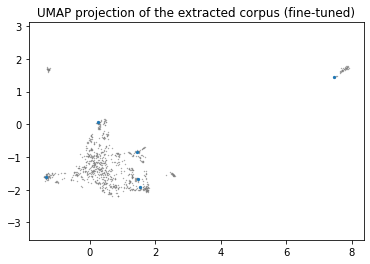

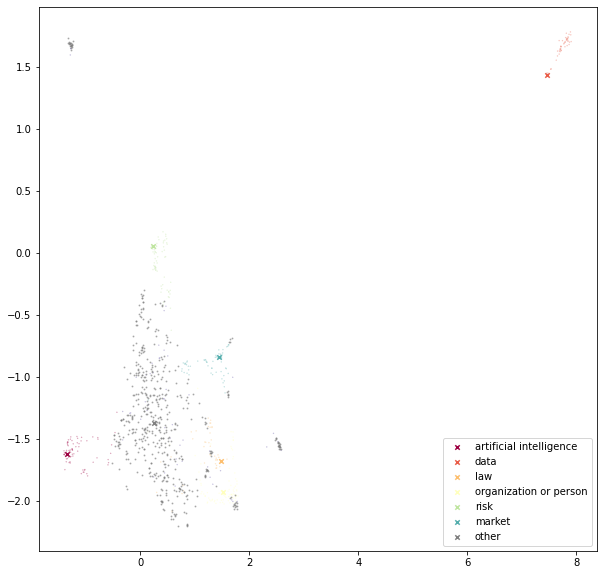

cluster size :
|-artificial intelligence : 70
|-data : 44
|-law : 42
|-organization or person : 85
|-risk : 63
|-market : 62
|-other : 588
  |-unlabeled terms within 'other': 536
0.13372433
763


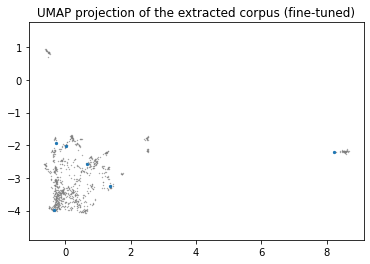

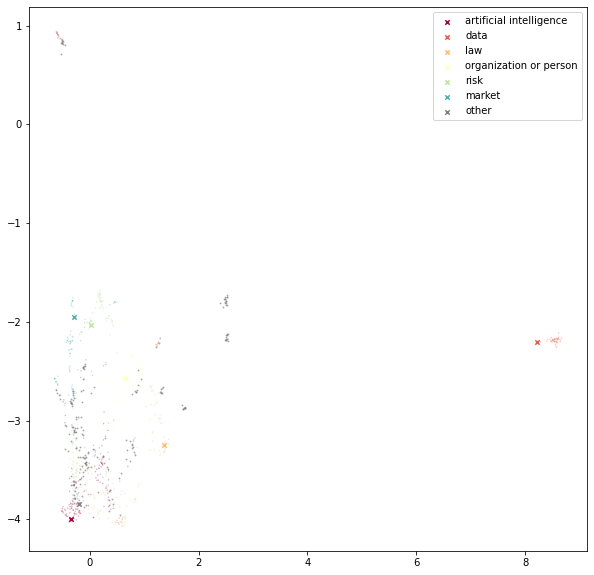

cluster size :
|-artificial intelligence : 147
|-data : 72
|-law : 124
|-organization or person : 129
|-risk : 154
|-market : 105
|-other : 223
  |-unlabeled terms within 'other': 191


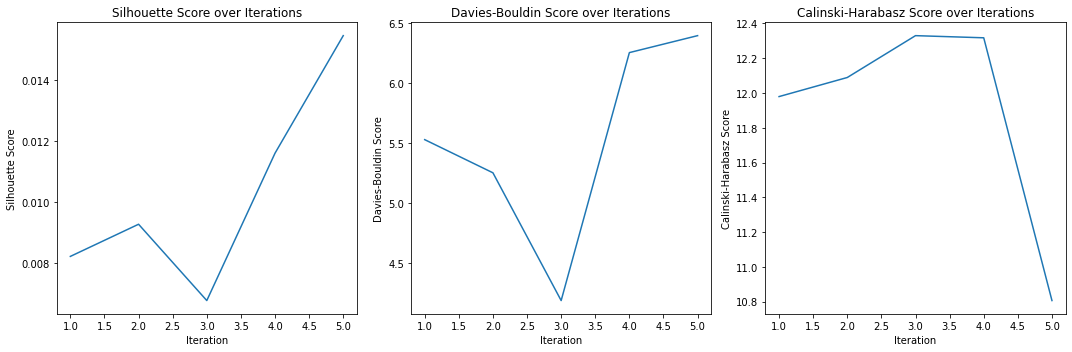

Silhouette : 0.01544974
Davies Bouldin : 6.3982136878318085
Calinski Harabasz : 10.8065405717687
False


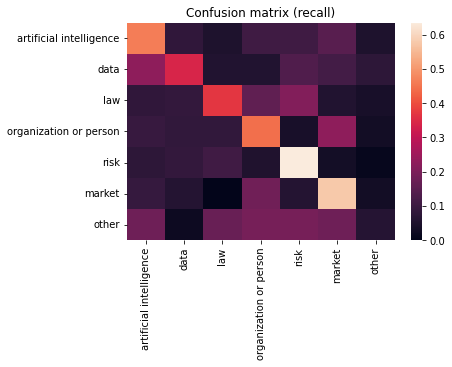

size of predicted: 726
Accuracy : 0.40082644628099173
Precision : 0.4350251521192249
Recall : 0.40082644628099173
f1 : 0.3956471993584781
               Prediction             Ground truth
0  organization or person   organization or person
1                     law  artificial intelligence
2                    data                      law
3                     law                      law
4                  market  artificial intelligence


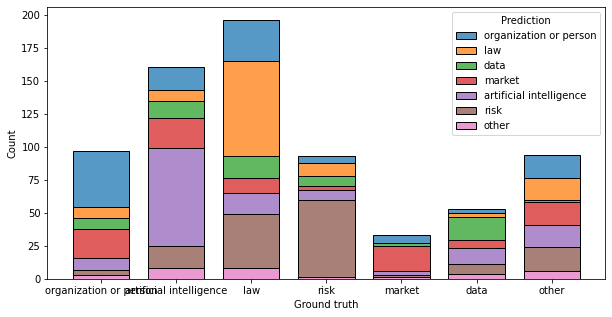

In [99]:
y_pred = model.iterate(X, y, 5,verbose=1)


In [ ]:
print(y_pred)

In [2]:
"{:.3f}".format(0.333598)

'0.334'